In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df1 = pd.read_csv('customers.csv')  # Load the first table
df2 = pd.read_csv('sales.csv')  # Load the second table
df3 = pd.read_csv('salesmen.csv')  # Load the third table
df4 = pd.read_csv('financing.csv')  # Load the fourth table

In [3]:
print(df1.head())  # Check the first few rows
print(df2.head())
print(df3.head())  
print(df4.head())

   customer_id first_name last_name  credit_score  annual_income  \
0            1       Paul       Lee           492          55700   
1            2      James     Smith           659          91472   
2            3    Richard   Johnson           309          74113   
3            4      David  Anderson           577         113575   
4            5     Joshua     Perez           370          32422   

  employement_status                          address  debt_to_income_ratio  
0           Employed    1010 Elm St, Flower Mound, TX                  0.64  
1      Self-employed      5050 Oak St, Richardson, TX                  0.21  
2         Unemployed      5050 Oak St, Richardson, TX                  0.73  
3      Self-employed  2020 Willow St, Colleyville, TX                  0.24  
4      Self-employed         357 Cedar St, Frisco, TX                  1.48  
         Make    Model    Year  acquisition_price  sale_price  profit  \
0       Volvo     XC60  2016.0            35890.0 

In [4]:
# Merge customers with sales based on customer_id
merged_df = pd.merge(df1, df2, on='customer_id', how='inner')

# Merge the result with salesmen on salesman_id
merged_df = pd.merge(merged_df, df3, on='salesman_id', how='inner')

# Finally, merge with financing on sale_id and customer_id
final_df = pd.merge(merged_df, df4, on=['sale_id', 'customer_id'], how='inner')

# Inspect the merged data
print(final_df.head())


   customer_id first_name last_name  credit_score  annual_income  \
0            1       Paul       Lee           492          55700   
1           13      James    Thomas           372          53325   
2           16     Donald   Jackson           748         103914   
3           26     Joseph  Anderson           451          51227   
4           32     Joshua    Garcia           428          61949   

  employement_status                        address  debt_to_income_ratio  \
0           Employed  1010 Elm St, Flower Mound, TX                  0.64   
1         Unemployed     3030 Maple St, Coppell, TX                  0.90   
2           Employed        135 Maple St, Plano, TX                  0.10   
3           Employed   468 Spruce St, Grapevine, TX                  0.78   
4      Self-employed      4040 Birch St, Keller, TX                  0.68   

         Make    Model  ...           name  base_salary  commission_rate  \
0      Toyota    Camry  ...  Daniel Wilson        36

name
Andrew Thomas       2012244.55
David Miller        1956090.50
Sophia Moore        1908853.50
Michael Williams    1832354.70
Daniel Wilson       1828107.50
Chris Davis         1806673.25
Matthew Anderson    1794841.75
Emily Taylor        1783070.20
Alex Johnson        1736536.75
Sarah Jones         1714543.55
Name: loan_amount, dtype: float64


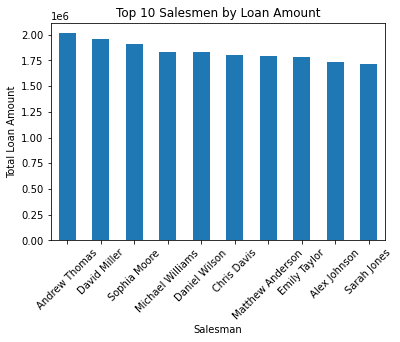

In [8]:
# Group by 'name' (salesman name) and sum the 'loan_amount'
sales_by_salesman = final_df.groupby('name')['loan_amount'].sum().sort_values(ascending=False)

# Print the top 10 salesmen by total loan amount
print(sales_by_salesman.head(10))

# Visualization - Top 10 Salesmen by Loan Amount
sales_by_salesman.head(10).plot(kind='bar', title='Top 10 Salesmen by Loan Amount')
plt.xlabel('Salesman')
plt.ylabel('Total Loan Amount')
plt.xticks(rotation=45)
plt.show()



Loan Amount Distribution Statistics:
count     1000.000000
mean     21283.530450
std      15711.312079
min       1813.350000
25%       6048.787500
50%      20014.000000
75%      31750.250000
max      83016.000000
Name: loan_amount, dtype: float64


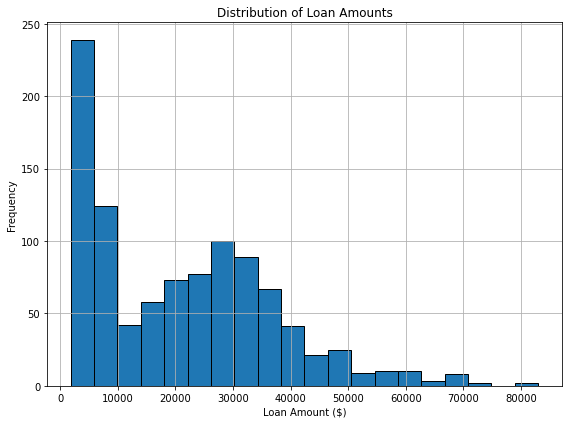

In [9]:
import matplotlib.pyplot as plt

# Describe the distribution of loan amounts to get summary statistics
loan_distribution = final_df['loan_amount'].describe()
print("Loan Amount Distribution Statistics:")
print(loan_distribution)

# Visualization - Loan Amount Distribution
plt.figure(figsize=(8, 6))
final_df['loan_amount'].plot(kind='hist', bins=20, edgecolor='black', title='Loan Amount Distribution')
plt.xlabel('Loan Amount ($)')
plt.ylabel('Frequency')
plt.title('Distribution of Loan Amounts')
plt.grid(True)
plt.tight_layout()
plt.show()


Top 10 Salesmen by Profit:
name
Sophia Moore        413378.05
Matthew Anderson    376218.45
Andrew Thomas       370746.35
Michael Williams    351331.30
John Smith          338314.80
Daniel Wilson       317687.95
Alex Johnson        314992.05
Chris Davis         314182.25
David Miller        311992.15
Emily Taylor        300078.60
Name: profit, dtype: float64


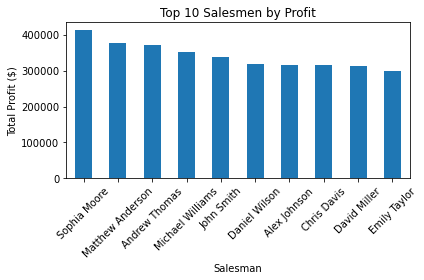

In [11]:
# Group by 'name' and sum the profit
profit_by_salesman = final_df.groupby('name')['profit'].sum().sort_values(ascending=False)

# Print the top 10 salesmen by profit
print("Top 10 Salesmen by Profit:")
print(profit_by_salesman.head(10))

# Visualization - Top 10 Salesmen by Profit
profit_by_salesman.head(10).plot(kind='bar', title='Top 10 Salesmen by Profit')
plt.xlabel('Salesman')
plt.ylabel('Total Profit ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Interest Rate Distribution Statistics:
count    1000.000000
mean        7.393335
std         2.911038
min         3.001092
25%         4.396087
50%         8.100683
75%         9.963269
max        11.999234
Name: interest_rate, dtype: float64


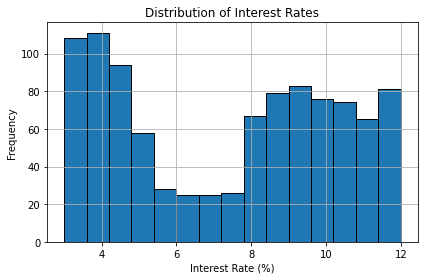

In [12]:
# Describe interest rate distribution
interest_rate_stats = final_df['interest_rate'].describe()
print("Interest Rate Distribution Statistics:")
print(interest_rate_stats)

# Visualization - Interest Rate Distribution
final_df['interest_rate'].plot(kind='hist', bins=15, edgecolor='black', title='Interest Rate Distribution')
plt.xlabel('Interest Rate (%)')
plt.ylabel('Frequency')
plt.title('Distribution of Interest Rates')
plt.grid(True)
plt.tight_layout()
plt.show()


Credit Score Category Distribution:
credit_category
Poor           513
Fair           168
Good           131
Very Good      105
Exceptional     83
Name: count, dtype: int64


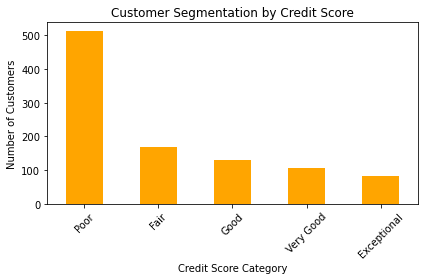

In [13]:
# Define credit score categories
bins = [0, 580, 670, 740, 800, 900]
labels = ['Poor', 'Fair', 'Good', 'Very Good', 'Exceptional']
final_df['credit_category'] = pd.cut(final_df['credit_score'], bins=bins, labels=labels)

# Count customers in each credit score category
credit_score_distribution = final_df['credit_category'].value_counts()

# Print credit score category distribution
print("Credit Score Category Distribution:")
print(credit_score_distribution)

# Visualization - Credit Score Category Distribution
credit_score_distribution.plot(kind='bar', color='orange', title='Customer Segmentation by Credit Score')
plt.xlabel('Credit Score Category')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Top 10 Vehicle Makes by Profit:
Make
Mercedes-Benz    246797.40
Lexus            246580.50
Volvo            226030.55
Volkswagen       222089.65
Ford             221482.00
Tesla            213740.00
Dodge            207885.80
BMW              203308.95
Acura            194775.15
Toyota           193250.35
Name: profit, dtype: float64


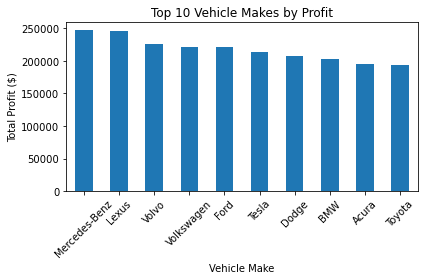

In [14]:
# Group by vehicle make and sum the profit
profit_by_make = final_df.groupby('Make')['profit'].sum().sort_values(ascending=False)

# Print the top 10 vehicle makes by profit
print("Top 10 Vehicle Makes by Profit:")
print(profit_by_make.head(10))

# Visualization - Top 10 Vehicle Makes by Profit
profit_by_make.head(10).plot(kind='bar', title='Top 10 Vehicle Makes by Profit')
plt.xlabel('Vehicle Make')
plt.ylabel('Total Profit ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Monthly Sales Trend:
sale_year  sale_month
2014       1              285696.95
           2              306143.30
           3              225407.35
           4              348483.10
           5              330244.25
           6              273756.20
           7              291764.55
           8              259155.70
           9              244844.95
           10             379844.60
           11             343640.10
           12             329123.05
2015       1              305654.30
           2              669065.10
           3              389344.45
           4              581387.30
           5              344123.00
           6              607879.50
           7              437659.55
           8              461586.65
           9              492671.80
           10             273443.65
           11             656417.55
           12             294432.05
2016       1              926407.95
           2              717338.00
           3         

<ipython-input-15-4b6c3f90f3ea>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  final_df['sale_date'] = pd.to_datetime(final_df['sale_date'])


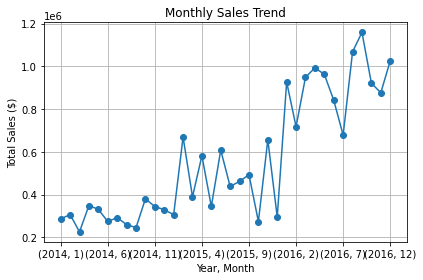

In [15]:
# Convert sale_date to datetime if necessary
final_df['sale_date'] = pd.to_datetime(final_df['sale_date'])

# Extract month and year
final_df['sale_month'] = final_df['sale_date'].dt.month
final_df['sale_year'] = final_df['sale_date'].dt.year

# Group by month and year, then sum sale prices
monthly_sales = final_df.groupby(['sale_year', 'sale_month'])['sale_price'].sum()

# Print monthly sales trend
print("Monthly Sales Trend:")
print(monthly_sales)

# Visualization - Monthly Sales Trend
monthly_sales.plot(kind='line', title='Monthly Sales Trend', marker='o')
plt.xlabel('Year, Month')
plt.ylabel('Total Sales ($)')
plt.grid(True)
plt.tight_layout()
plt.show()


Loan Approval Rate:
approval_status
Denied      55.8
Approved    44.2
Name: proportion, dtype: float64


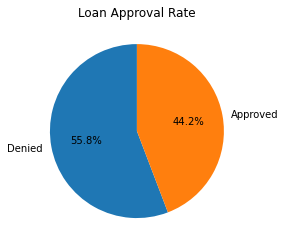

In [16]:
# Calculate approval rates
approval_rate = final_df['approval_status'].value_counts(normalize=True) * 100

# Print approval rate
print("Loan Approval Rate:")
print(approval_rate)

# Visualization - Loan Approval Rate
approval_rate.plot(kind='pie', autopct='%1.1f%%', startangle=90, title='Loan Approval Rate')
plt.ylabel('')
plt.show()


Days on Lot Statistics:
count    1000.000000
mean       44.646000
std        26.042521
min         1.000000
25%        23.000000
50%        44.500000
75%        66.000000
max        90.000000
Name: days_on_lot, dtype: float64


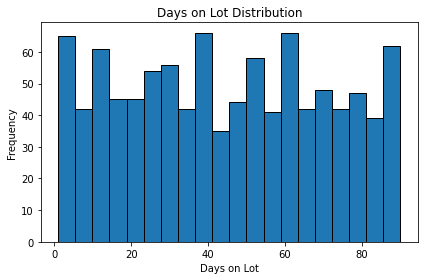

In [17]:
# Describe days on lot statistics
days_on_lot_stats = final_df['days_on_lot'].describe()
print("Days on Lot Statistics:")
print(days_on_lot_stats)

# Visualization - Days on Lot Distribution
final_df['days_on_lot'].plot(kind='hist', bins=20, edgecolor='black', title='Days on Lot Distribution')
plt.xlabel('Days on Lot')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


Average Loan Amount by DTI Category:
dti_category
Very Low     20132.729815
Low          21378.814522
Moderate     22862.492584
High         20036.021101
Very High    20481.048667
Name: loan_amount, dtype: float64


<ipython-input-18-00c578f9ff51>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dti_loan_avg = final_df.groupby('dti_category')['loan_amount'].mean()


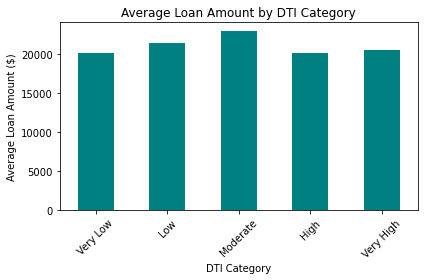

In [18]:
# Define DTI categories
dti_bins = [0, 0.2, 0.4, 0.6, 0.8, 1]
dti_labels = ['Very Low', 'Low', 'Moderate', 'High', 'Very High']
final_df['dti_category'] = pd.cut(final_df['debt_to_income_ratio'], bins=dti_bins, labels=dti_labels)

# Group by DTI category and calculate average loan amount
dti_loan_avg = final_df.groupby('dti_category')['loan_amount'].mean()

# Print DTI category and loan amount analysis
print("Average Loan Amount by DTI Category:")
print(dti_loan_avg)

# Visualization - Average Loan Amount by DTI Category
dti_loan_avg.plot(kind='bar', color='teal', title='Average Loan Amount by DTI Category')
plt.xlabel('DTI Category')
plt.ylabel('Average Loan Amount ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


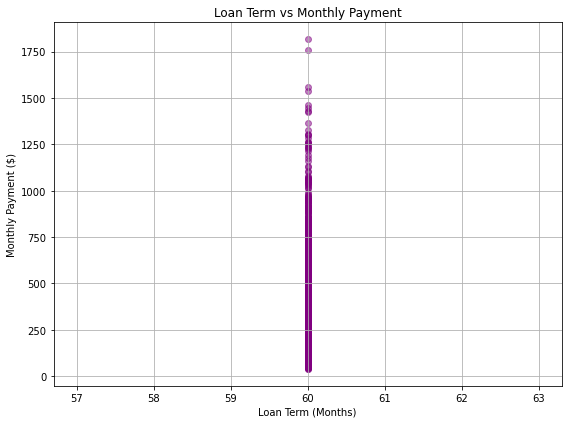

In [19]:
# Scatter plot for loan term vs. monthly payment
plt.figure(figsize=(8, 6))
plt.scatter(final_df['loan_term_months'], final_df['monthly_payment'], alpha=0.5, color='purple')
plt.title('Loan Term vs Monthly Payment')
plt.xlabel('Loan Term (Months)')
plt.ylabel('Monthly Payment ($)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [20]:
# Estimate Customer Lifetime Value (CLV)
avg_sale_price = final_df.groupby('customer_id')['sale_price'].sum().mean()  # Average sale price per customer
retention_rate = 0.2  # Assume 20% of customers return for future purchases
clv = avg_sale_price / (1 - retention_rate)

print(f"Estimated Customer Lifetime Value (CLV): ${clv:.2f}")


Estimated Customer Lifetime Value (CLV): $29775.31


Average Sale Price by Vehicle Age:
vehicle_age
0.0     36770.703540
1.0     31160.297297
2.0     21680.402778
3.0     22274.060606
4.0     23140.339623
5.0     22940.983607
6.0     16827.646552
7.0     12133.473958
8.0      5248.301351
9.0      4448.570238
10.0     4463.506410
11.0     4243.155556
12.0     4077.010811
13.0     3223.602857
14.0     3808.882759
15.0     3674.400000
16.0     3065.388462
Name: sale_price, dtype: float64


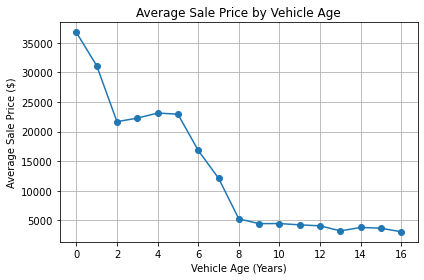

In [21]:
# Calculate vehicle age at the time of sale
final_df['vehicle_age'] = final_df['sale_date'].dt.year - final_df['Year']

# Group by vehicle age and calculate average sale price
avg_sale_price_by_age = final_df.groupby('vehicle_age')['sale_price'].mean()

# Print average sale price by vehicle age
print("Average Sale Price by Vehicle Age:")
print(avg_sale_price_by_age)

# Visualization - Average Sale Price by Vehicle Age
avg_sale_price_by_age.plot(kind='line', marker='o', title='Average Sale Price by Vehicle Age')
plt.xlabel('Vehicle Age (Years)')
plt.ylabel('Average Sale Price ($)')
plt.grid(True)
plt.tight_layout()
plt.show()


<ipython-input-22-5bd8f69290b0>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  approval_by_credit = final_df.groupby('credit_category')['approval_status'].value_counts(normalize=True).unstack() * 100


Loan Approval Rate by Credit Score Category:
approval_status    Approved      Denied
credit_category                        
Poor               0.000000  100.000000
Fair              73.214286   26.785714
Good             100.000000    0.000000
Very Good        100.000000    0.000000
Exceptional      100.000000    0.000000


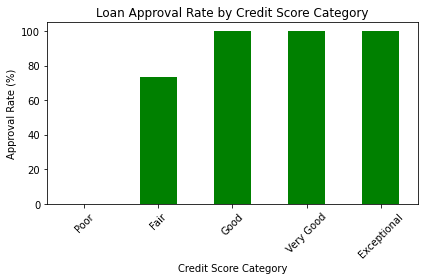

In [22]:
# Group by credit score category and calculate approval rate
approval_by_credit = final_df.groupby('credit_category')['approval_status'].value_counts(normalize=True).unstack() * 100

# Print approval rate by credit score category
print("Loan Approval Rate by Credit Score Category:")
print(approval_by_credit)

# Visualization - Approval Rate by Credit Score Category
approval_by_credit['Approved'].plot(kind='bar', color='green', title='Loan Approval Rate by Credit Score Category')
plt.xlabel('Credit Score Category')
plt.ylabel('Approval Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Average Profit by Add-ons Purchased:
add_ons_purchased
0    3833.46715
Name: profit, dtype: float64


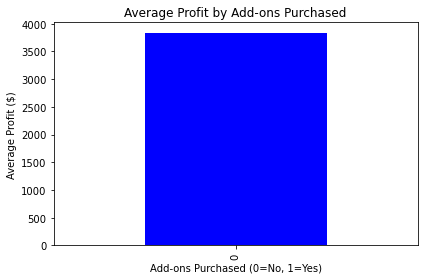

In [23]:
# Create binary column for add-ons
final_df['add_ons_purchased'] = final_df['add_ons'].apply(lambda x: 1 if x == 'Yes' else 0)

# Group by add-ons and calculate average profit
profit_by_addons = final_df.groupby('add_ons_purchased')['profit'].mean()

# Print profit comparison for customers with and without add-ons
print("Average Profit by Add-ons Purchased:")
print(profit_by_addons)

# Visualization - Profit by Add-ons Purchased
profit_by_addons.plot(kind='bar', color='blue', title='Average Profit by Add-ons Purchased')
plt.xlabel('Add-ons Purchased (0=No, 1=Yes)')
plt.ylabel('Average Profit ($)')
plt.tight_layout()
plt.show()


In [24]:
# Group by credit score and DTI ratio to estimate default risk (assuming default column exists)
if 'default_status' in final_df.columns:
    default_risk = final_df.groupby(['credit_category', 'dti_category'])['default_status'].mean()
    print("Estimated Default Risk by Credit Score and DTI Category:")
    print(default_risk)


Correlation between Down Payment and Monthly Payment:
                 down_payment  monthly_payment
down_payment         1.000000         0.993215
monthly_payment      0.993215         1.000000


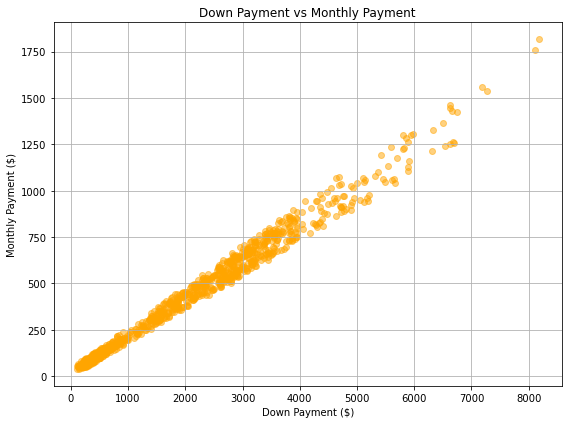

In [25]:
# Correlation between down payment and monthly payment
correlation = final_df[['down_payment', 'monthly_payment']].corr()

# Print the correlation matrix
print("Correlation between Down Payment and Monthly Payment:")
print(correlation)

# Scatter plot - Down Payment vs. Monthly Payment
plt.figure(figsize=(8, 6))
plt.scatter(final_df['down_payment'], final_df['monthly_payment'], alpha=0.5, color='orange')
plt.title('Down Payment vs Monthly Payment')
plt.xlabel('Down Payment ($)')
plt.ylabel('Monthly Payment ($)')
plt.grid(True)
plt.tight_layout()
plt.show()
